In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('midfielders_rating_saves_X.csv')
y = pd.read_csv('midfielders_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w  assists  chances2score  clearances  \
0             0.0        0.0        0.0      1.0            0.0         0.0   
1             0.0        0.0        0.0      0.0            0.0         0.0   
2             0.0        0.0        0.0      0.0            0.0         0.0   
3             1.0        0.0        0.0      0.0            0.0         0.0   
4             0.0        1.0        0.0      0.0            0.0         0.0   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  minutesPlayed  \
0          0.0          0.0            0.0      0.027027  ...       0.014493   
1          1.0          0.0            0.0      0.108108  ...       0.082126   
2          1.0          0.0            0.0      0.054054  ...       0.000000   
3          0.0          0.0            0.0      0.027027  ...       0.014493   
4          0.0          0.0            0.0      0.054054  ...       0.000000   

   pos_role_AMC  pos_role_AML  pos_role_AMR 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X.dtypes

matches_played            float64
aerials_l                 float64
aerials_w                 float64
assists                   float64
chances2score             float64
clearances                float64
countattack               float64
crosses_acc               float64
crosses_inacc             float64
dangmistakes              float64
drib_success              float64
drib_unsuccess            float64
dribbled_past             float64
fouls                     float64
goals                     float64
grduels_l                 float64
grduels_w                 float64
interceptions             float64
lballs_acc                float64
lballs_inacc              float64
missed_penalties          float64
offsides                  float64
owngoals                  float64
passes_acc                float64
passes_inacc              float64
poss_lost                 float64
rcards                    float64
saves_otb                 float64
shots_offtarget           float64
shots_ontarget

In [5]:
import pandas as pd

# Assuming X_train_corr is your DataFrame
df = X

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:


In [6]:
X.shape

(942, 55)

In [7]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'lballs_acc', 'lballs_inacc', 'missed_penalties', 'offsides',
       'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost', 'rcards',
       'saves_otb', 'shots_offtarget', 'shots_ontarget', 'shotsblocked',
       'stop_shots', 'tackles', 'tballs_acc', 'tballs_inacc', 'touches',
       'wasfouled', 'ycards', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'flow_centrality', 'betweenness2goals',
       'game_duration', 'flow_success', 'minutesPlayed', 'pos_role_AMC',
       'pos_role_AML', 'pos_role_AMR', 'pos_role_DMC', 'pos_role_DML',
       'pos_role_DMR', 'pos_role_MC', 'pos_role_ML', 'pos_role_MR'],
      dtype='object')

In football (soccer), player positions are grouped into four main categories: Goalkeepers, Defenders, Midfielders, and Forwards. Each of the columns you mentioned in your dataset corresponds to a specific position within these categories. Here’s a detailed breakdown:

Goalkeepers (GK)
GK (Goalkeeper): The primary role is to prevent the opposing team from scoring by guarding the goal. Goalkeepers are the only players allowed to use their hands, but only within the penalty area.
Defenders
LB (Left Back): A defender positioned on the left side, responsible for preventing opposition attacks down the right wing.
LCB (Left Center Back): A central defender on the left side of the defense.
CB (Center Back): Central defenders who protect the area directly in front of the goal.
RCB (Right Center Back): A central defender on the right side of the defense.
RB (Right Back): A defender positioned on the right side, responsible for preventing opposition attacks down the left wing.
LWB (Left Wing Back): Similar to a left back but with more offensive duties, often seen in formations with three central defenders.
RWB (Right Wing Back): Similar to a right back but with more offensive duties, often seen in formations with three central defenders.
Midfielders
CDM (Center Defensive Midfielder): Positioned in front of the defenders, focusing on intercepting the ball and breaking up opposition plays.
LDM (Left Defensive Midfielder): A defensive midfielder on the left side.
RDM (Right Defensive Midfielder): A defensive midfielder on the right side.
CM (Center Midfielder): Plays centrally, linking defense and attack, often covering both defensive and offensive roles.
LCM (Left Center Midfielder): A central midfielder leaning towards the left.
RCM (Right Center Midfielder): A central midfielder leaning towards the right.
CAM (Center Attacking Midfielder): Positioned behind the forwards, focusing on creating scoring opportunities.
LAM (Left Attacking Midfielder): An attacking midfielder on the left side.
RAM (Right Attacking Midfielder): An attacking midfielder on the right side.
LM (Left Midfielder): Positioned on the left side of the midfield, balancing defense and attack.
RM (Right Midfielder): Positioned on the right side of the midfield, balancing defense and attack.
Forwards
ST (Striker): The primary goal-scorer, positioned closest to the opponent's goal.
LS (Left Striker): A forward on the left side of the attack.
RS (Right Striker): A forward on the right side of the attack.
CF (Center Forward): Similar to a striker but may play slightly deeper, involved in both scoring and assisting.
LF (Left Forward): Positioned on the left side, slightly behind the main striker.
RF (Right Forward): Positioned on the right side, slightly behind the main striker.
LW (Left Winger): Positioned on the left wing, focused on delivering crosses and creating scoring opportunities from wide positions.
RW (Right Winger): Positioned on the right wing, focused on delivering crosses and creating scoring opportunities from wide positions.
These groupings ensure a balanced distribution of responsibilities on the field, with each position playing a crucial role in the team's overall strategy​ (Football Guide)​​ (Jobs In Football)​​ (Soccermodo)​.

https://www.football-guide.com/soccer-info/soccer-positions-explained.html

https://jobsinfootball.com/blog/soccer-positions/

https://soccermodo.com/soccer-positions/






In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature        Score
0                grduels_w  2358.693751
1            interceptions  1508.788185
2             tballs_inacc  1122.795729
3        betweenness2goals   914.825366
4               tballs_acc   817.808489
5            game_duration   771.586361
6                    fouls   724.294702
7                grduels_l   712.292760
8            dribbled_past   698.810248
9             flow_success   635.777867
10       degree_centrality   601.351002
11               poss_lost   585.588882
12         shots_offtarget   578.084172
13                  ycards   551.577351
14            dangmistakes   501.264041
15  betweenness_centrality   445.146800
16               saves_otb   440.178119
17            passes_inacc   435.837230
18                 tackles   423.496767
19            lballs_inacc   365.604866
20              passes_acc   324.058574
21        missed_penalties   317.148356
22           minutesPlayed   293.316984
23            shotsblocked   234.973334


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Perform feature selection using SelectKBest with mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                   Feature     Score
0                grduels_w  0.556915
1            interceptions  0.421633
2        betweenness2goals  0.396591
3               tballs_acc  0.376529
4             tballs_inacc  0.367616
5                    fouls  0.336027
6             passes_inacc  0.327166
7             flow_success  0.326341
8          shots_offtarget  0.316881
9                grduels_l  0.314370
10                  ycards  0.313785
11           game_duration  0.302496
12                 tackles  0.301991
13       degree_centrality  0.299804
14            dangmistakes  0.292636
15            lballs_inacc  0.292231
16               poss_lost  0.280532
17  betweenness_centrality  0.268973
18        missed_penalties  0.262094
19               saves_otb  0.236881
20           minutesPlayed  0.228696
21              passes_acc  0.224401
22           dribbled_past  0.203618
23                  rcards  0.197633
24            shotsblocked  0.193616
25            pos_role_DMR  0.189695
2

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Feature  Importance
0                grduels_w    0.414596
1            interceptions    0.106013
2        betweenness2goals    0.066985
3             tballs_inacc    0.052413
4            game_duration    0.039251
5               tballs_acc    0.032275
6                    fouls    0.030008
7              pos_role_ML    0.022600
8             flow_success    0.014924
9                grduels_l    0.014381
10                  ycards    0.013713
11               poss_lost    0.011782
12            passes_inacc    0.010174
13            shotsblocked    0.009180
14                 tackles    0.008068
15          matches_played    0.007920
16               saves_otb    0.007066
17           dribbled_past    0.006758
18  betweenness_centrality    0.006530
19             pos_role_MR    0.005639
20            lballs_inacc    0.005599
21    closeness_centrality    0.005563
22            pos_role_AMC    0.005456
23            pos_role_DML    0.005303
24        missed_penaltie

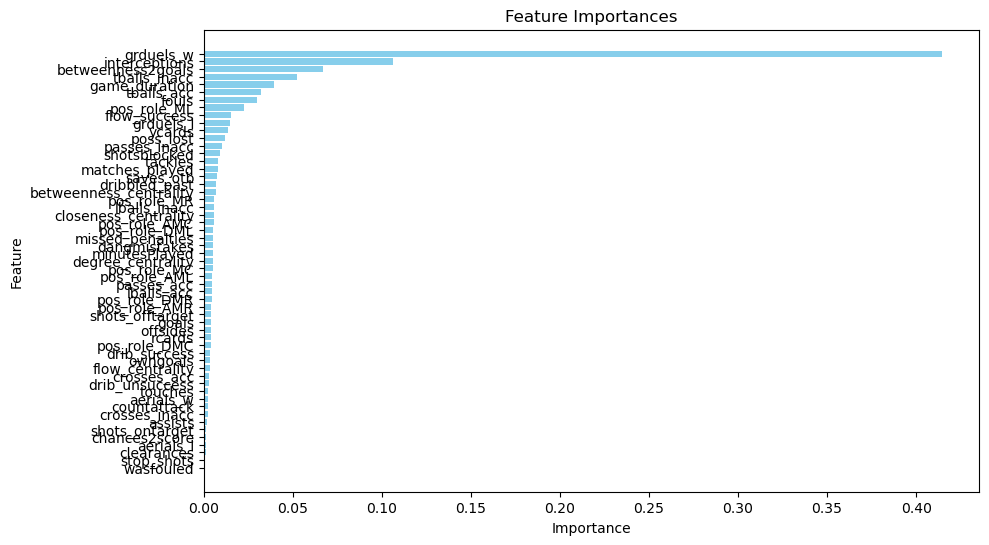

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Fit an ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [11]:
import pandas as pd

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
data.corr()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals,grduels_l,grduels_w,interceptions,lballs_acc,lballs_inacc,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_otb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,flow_success,minutesPlayed,pos_role_AMC,pos_role_AML,pos_role_AMR,pos_role_DMC,pos_role_DML,pos_role_DMR,pos_role_MC,pos_role_ML,pos_role_MR,keypasses
matches_played,1.000000,-0.127386,-0.128296,-0.184160,-0.097432,-0.101807,-0.263388,-0.121833,-0.124631,0.020118,0.055463,-0.056568,0.103321,0.159519,-0.132646,0.134566,0.038378,0.033245,-0.051282,0.127300,0.125501,-0.060509,-0.013007,0.199722,0.026428,0.088962,-0.089163,-0.071145,-0.050971,0.163023,0.191542,-0.033115,-0.037138,0.008182,0.035472,0.002077,-0.014018,0.110899,0.179948,0.092303,-0.116403,-0.089994,0.129225,0.086629,-0.019258,0.077966,-0.084301,-0.042275,-0.071584,-0.020591,-0.133170,0.140641,-0.058509,0.062844,-0.095562,0.121350
aerials_l,-0.127386,1.000000,-0.088386,-0.126873,-0.067123,-0.070138,-0.181455,-0.083934,-0.085862,-0.039340,0.007741,-0.034741,0.077369,0.075892,-0.118656,0.001374,0.012299,0.085077,-0.055800,0.076728,0.142464,-0.072803,-0.055697,0.034353,-0.017661,0.043573,-0.086744,-0.111885,-0.082013,0.008526,0.089439,0.036717,-0.094789,-0.057450,-0.010641,0.049139,-0.009657,0.062173,0.072687,0.072469,-0.115459,-0.087156,-0.017917,-0.023465,-0.068972,-0.014795,-0.069142,-0.143704,-0.149551,-0.103732,-0.155275,0.062223,-0.028735,-0.020220,-0.054062,-0.000563
aerials_w,-0.128296,-0.088386,1.000000,-0.127778,-0.067602,-0.070638,-0.182751,-0.084533,-0.086475,-0.046359,-0.019717,-0.070050,0.046783,0.053737,-0.102690,0.012322,0.080569,0.095623,-0.075086,0.004904,0.025438,-0.088908,-0.075007,0.048236,-0.053349,-0.018667,-0.090833,-0.072193,-0.061853,-0.023465,0.122452,-0.022977,-0.082956,-0.052474,-0.016658,-0.036796,-0.009726,0.032526,0.032787,0.009857,-0.103494,-0.100245,-0.026024,-0.040991,-0.067602,-0.049742,-0.088329,-0.080183,-0.109881,-0.042942,-0.128021,0.033412,0.018505,0.061934,-0.010417,0.073310
assists,-0.184160,-0.126873,-0.127778,1.000000,-0.097039,-0.101396,-0.262326,-0.121342,-0.124128,0.020402,0.043427,0.110683,-0.128183,-0.082884,0.142176,-0.080932,-0.111047,-0.162030,0.128470,-0.091193,-0.141049,0.108802,0.091679,-0.099464,0.035265,-0.020246,0.120130,0.176643,0.109470,-0.032447,-0.148441,0.011818,0.137321,0.059890,-0.004861,0.039287,-0.013961,-0.030649,-0.086242,-0.026743,0.161981,0.135248,-0.007775,0.036661,0.089328,0.034352,0.131379,0.223185,0.153287,0.164448,0.192169,-0.111531,0.031338,-0.049752,0.023900,-0.099551
chances2score,-0.097432,-0.067123,-0.067602,-0.097039,1.000000,-0.053645,-0.138786,-0.064197,-0.065671,-0.038229,-0.069468,-0.047841,-0.011563,-0.082134,0.047623,-0.086564,0.064541,0.080312,-0.047323,-0.052332,-0.054200,-0.072693,-0.077745,-0.075175,-0.078894,-0.067224,-0.022632,-0.031899,-0.006407,-0.029755,-0.040240,-0.017449,-0.057079,-0.027990,-0.015998,-0.027944,-0.007386,-0.082521,-0.071867,-0.068203,-0.002755,-0.050897,-0.088253,-0.082508,-0.033556,-0.075691,-0.053778,-0.076889,0.010691,-0.082040,0.036676,-0.074391,0.018820,-0.053230,0.041788,-0.011423
clearances,-0.101807,-0.070138,-0.070638,-0.101396,-0.053645,1.000000,-0.145019,-0.067080,-0.068621,-0.046718,-0.050104,-0.008786,-0.026425,-0.097132,0.042066,-0.090878,0.035532,0.045471,-0.060057,-0.060836,-0.041691,-0.043858,-0.078836,-0.062663,-0.066301,-0.075757,-0.021275,-0.033090,-0.006450,-0.031092,-0.054134,0.054085,-0.075783,-0.040728,-0.034593,-0.029199,-0.007718,-0.112846,-0.073241,-0.107272,-0.028479,-0.036647,-0.075326,-0.085867,-0.048035,-0.079804,-0.057092,-0.108385,-0.007471,-0.089588,-0.007274,-0.018116,-0.014551,-0.048945,0.063

<Axes: >

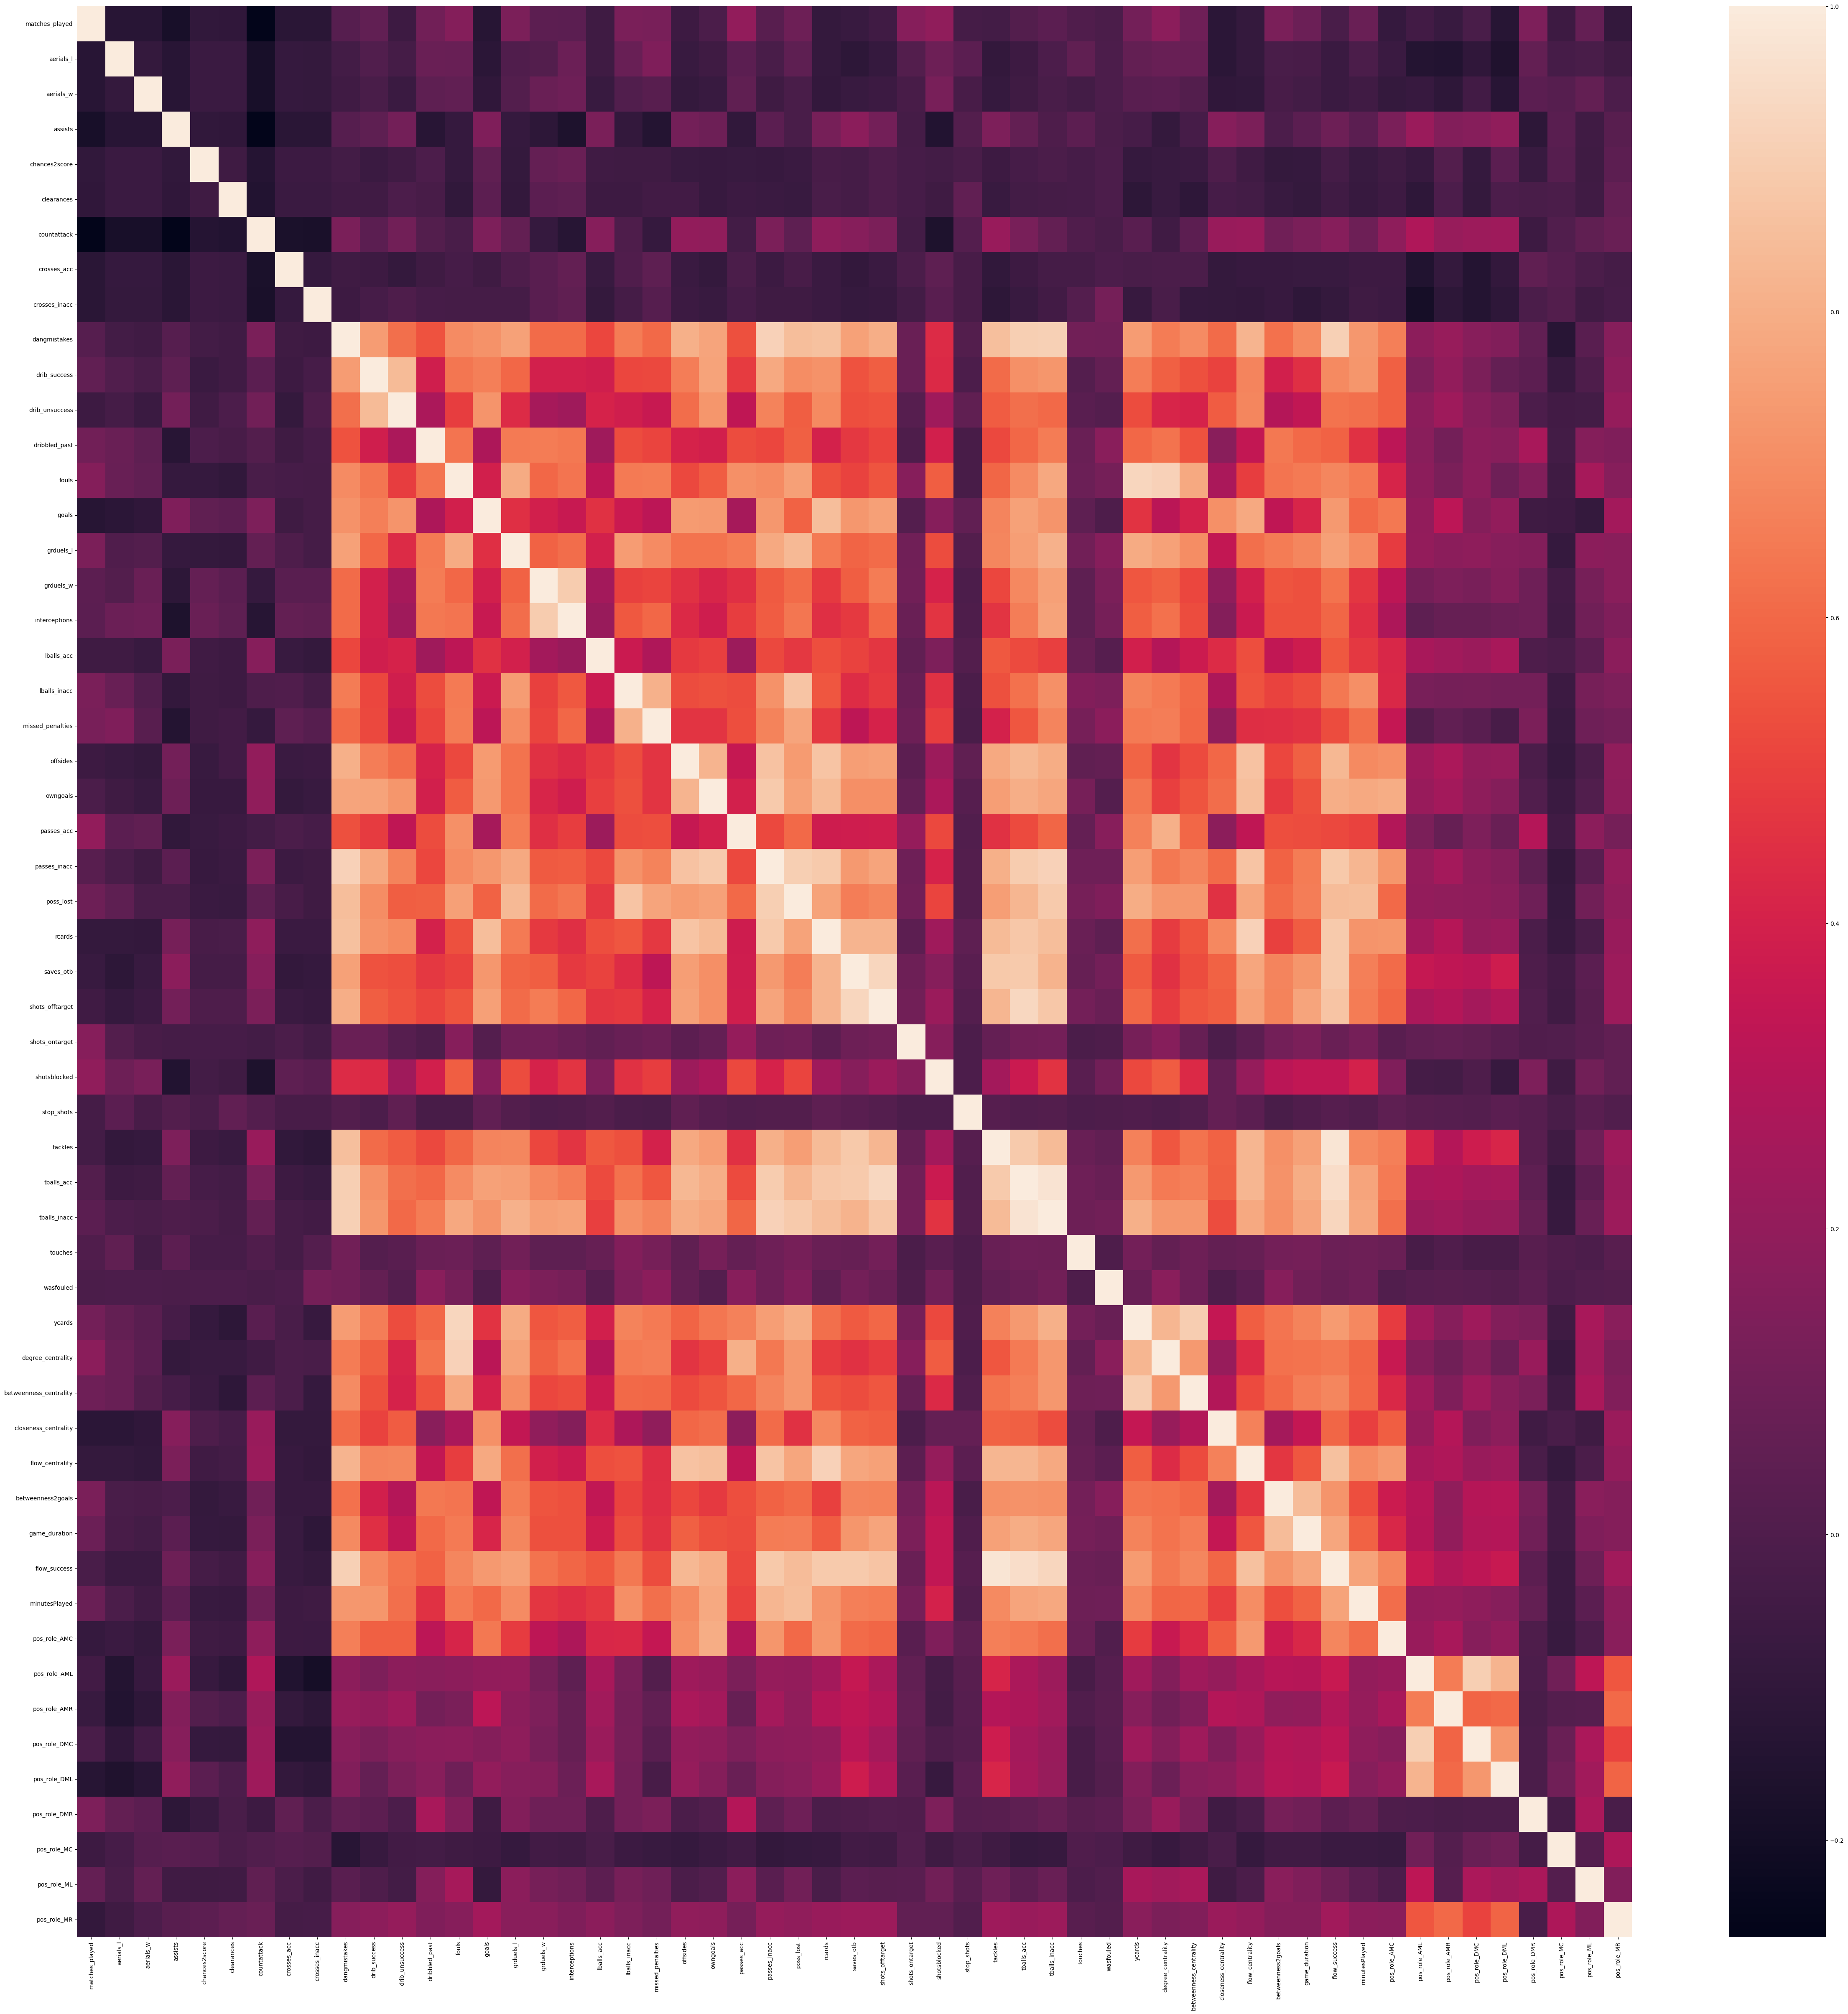

In [12]:
corr = data.drop(columns=['keypasses'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(data[top_features].corr(), annot=False)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
threshold = 0.8
correlation(data.drop(columns=['keypasses'], axis=1), threshold)

{'betweenness_centrality',
 'degree_centrality',
 'drib_unsuccess',
 'flow_centrality',
 'flow_success',
 'game_duration',
 'interceptions',
 'minutesPlayed',
 'missed_penalties',
 'offsides',
 'owngoals',
 'passes_inacc',
 'pos_role_DMC',
 'pos_role_DML',
 'poss_lost',
 'rcards',
 'saves_otb',
 'shots_offtarget',
 'tackles',
 'tballs_acc',
 'tballs_inacc',
 'ycards'}

In [15]:
#check the columns to know which other they are correlated with
#check the columns to know which other they are correlated with
def correlated_columns(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                correlated_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

    return col_corr, correlated_pairs

In [16]:
threshold = 0.8
col_corr, correlated_pairs = correlated_columns(data.drop(columns=['keypasses'], axis=1), threshold)

print("Highly correlated columns:")
print(col_corr)

print("\nPairs of highly correlated columns with their correlation coefficients:")
for pair in correlated_pairs:
    print(pair)

Highly correlated columns:
{'dangmistakes', 'flow_centrality', 'passes_acc', 'rcards', 'degree_centrality', 'flow_success', 'lballs_inacc', 'pos_role_AML', 'minutesPlayed', 'ycards', 'shots_offtarget', 'tballs_acc', 'tackles', 'poss_lost', 'fouls', 'tballs_inacc', 'offsides', 'drib_success', 'pos_role_DMC', 'drib_unsuccess', 'betweenness2goals', 'saves_otb', 'game_duration', 'interceptions', 'goals', 'pos_role_DML', 'owngoals', 'grduels_l', 'betweenness_centrality', 'missed_penalties', 'grduels_w', 'passes_inacc'}

Pairs of highly correlated columns with their correlation coefficients:
('drib_unsuccess', 'drib_success', 0.8417975392592799)
('interceptions', 'grduels_w', 0.8949532843436668)
('missed_penalties', 'lballs_inacc', 0.8124538696068352)
('offsides', 'dangmistakes', 0.803242154144761)
('owngoals', 'offsides', 0.8220103292043038)
('passes_inacc', 'dangmistakes', 0.9112631103963369)
('passes_inacc', 'offsides', 0.8660859959473352)
('passes_inacc', 'owngoals', 0.889868862416233)
(

In [18]:
correlation = df['aerials_w'].corr(df['matches_played'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.848351798745323


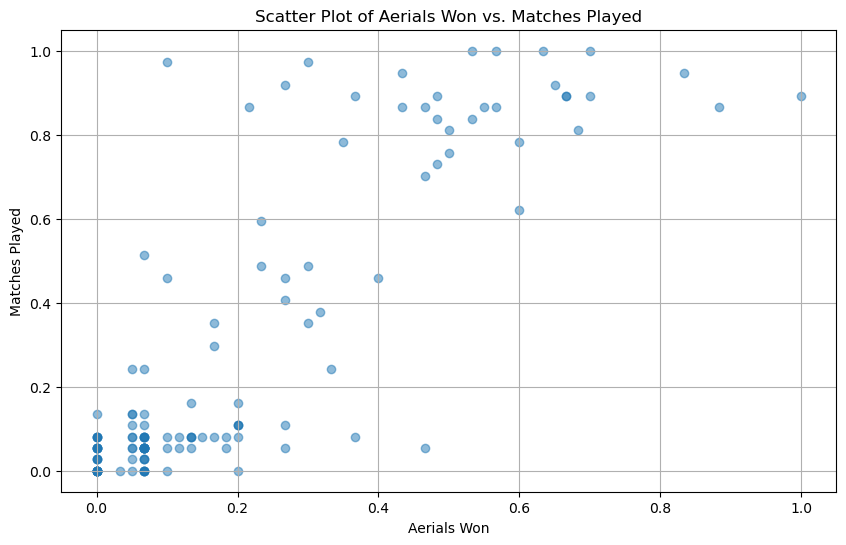

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['aerials_w'], df['matches_played'], alpha=0.5)
plt.title('Scatter Plot of Aerials Won vs. Matches Played')
plt.xlabel('Aerials Won')
plt.ylabel('Matches Played')
plt.grid(True)
plt.show()


In [43]:
# Save X and y to CSV files
#change to goalkeeprs features later
#X.to_csv('defenders_featusres.csv', index=False)
#y.to_csv('defenders_target.csv', index=False)

#print("Files saved: 'defenders_features.csv' and 'defenders_target.csv'")

Files saved: 'defenders_features.csv' and 'defenders_target.csv'


In [ ]:
#for feature enginnering, we can do averages of players of different matches in the same season